# Завдання
1. Напишіть код для стиснення зображення з використанням алгоритму JPEG.
2. Використовуючи бібліотеку `gzip`, напишіть код для стиснення текстового файлу.
3. Реалізуйте алгоритм Хаффмана для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.

## Рішення

In [241]:
import os
from PIL import Image
from matplotlib import pyplot as plt

### 1. Напишіть код для стиснення зображення з використанням алгоритму JPEG.

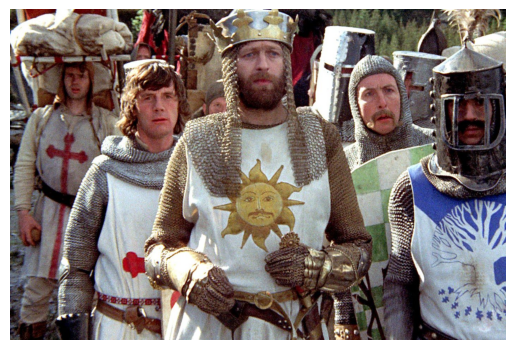

Розмір зображення: 306162 байт
Розмір файлу (1400, 933)


In [242]:
image_path = 'monty_python.jpg'
with Image.open(image_path) as image:
    plt.imshow(image)
    plt.axis('off')
plt.show()

print(f"Розмір зображення: {os.path.getsize(image_path)} байт\n"
      f"Розмір файлу {image.size}")

In [243]:
output_path = 'output_image.jpg'

with Image.open(image_path) as image:
    image.save(output_path, format='JPEG', quality=20, optimize=True)

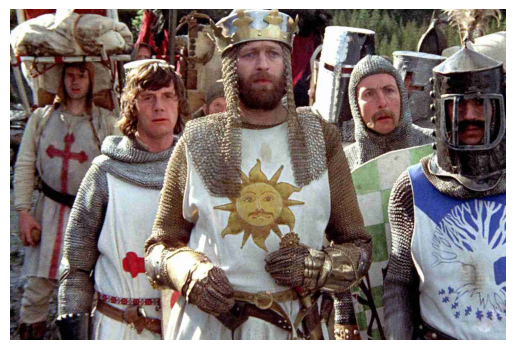

Розмір зображення: 94803 байт
Розмір файлу (1400, 933)


In [244]:
with Image.open(output_path) as image:
    plt.imshow(image)
    plt.axis('off')
plt.show()

print(f"Розмір зображення: {os.path.getsize(output_path)} байт\n"
      f"Розмір файлу {image.size}")

In [245]:
### 2. Використовуючи бібліотеку `gzip`, напишіть код для стиснення текстового файлу.

In [246]:
import gzip

input_file_path = 'text_file.txt'
compressed_file_path = 'compressed_file.gz'

with open(input_file_path, 'rt') as input_file, gzip.open(compressed_file_path, 'wt') as output_file:
    output_file.writelines(input_file)

print(f"Стиснення завершено!\n"
      f"Розмір початкового файлу: {os.path.getsize(input_file_path)} байт\n"
      f"Розмір файлу після стиснення: {os.path.getsize(compressed_file_path)} байт")

Стиснення завершено!
Розмір початкового файлу: 876 байт
Розмір файлу після стиснення: 483 байт


### 3. Реалізуйте алгоритм Хаффмана для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.

In [247]:
# Node of a Huffman Tree
class Nodes:
    def __init__(self, probability, symbol, left = None, right = None):
        # probability of the symbol
        self.probability = probability

        # the symbol
        self.symbol = symbol

        # the left node
        self.left = left

        # the right node
        self.right = right

        # the tree direction (0 or 1)
        self.code = ''

""" A supporting function in order to calculate the probabilities of symbols in specified data """
def CalculateProbability(the_data):
    the_symbols = dict()
    for item in the_data:
        if the_symbols.get(item) == None:
            the_symbols[item] = 1
        else:
            the_symbols[item] += 1
    return the_symbols

""" A supporting function in order to print the codes of symbols by travelling a Huffman Tree """
the_codes = dict()

def CalculateCodes(node, value = ''):
    # a huffman code for current node
    newValue = value + str(node.code)

    if(node.left):
        CalculateCodes(node.left, newValue)
    if(node.right):
        CalculateCodes(node.right, newValue)

    if(not node.left and not node.right):
        the_codes[node.symbol] = newValue

    return the_codes

""" A supporting function in order to get the encoded result """
def OutputEncoded(the_data, coding):
    encodingOutput = []
    for element in the_data:
        # print(coding[element], end = '')
        encodingOutput.append(coding[element])

    the_string = ''.join([str(item) for item in encodingOutput])
    return the_string

""" A supporting function in order to calculate the space difference between compressed and non compressed data"""
def TotalGain(the_data, coding):
    # total bit space to store the data before compression
    beforeCompression = len(the_data) * 8
    afterCompression = 0
    the_symbols = coding.keys()
    for symbol in the_symbols:
        the_count = the_data.count(symbol)
        # calculating how many bit is required for that symbol in total
        afterCompression += the_count * len(coding[symbol])
    print("Space usage before compression (in bits):", beforeCompression)
    print("Space usage after compression (in bits):",  afterCompression)

def HuffmanEncoding(the_data):
    symbolWithProbs = CalculateProbability(the_data)
    the_symbols = symbolWithProbs.keys()
    the_probabilities = symbolWithProbs.values()
    print("symbols: ", the_symbols)
    print("probabilities: ", the_probabilities)

    the_nodes = []

    # converting symbols and probabilities into huffman tree nodes
    for symbol in the_symbols:
        the_nodes.append(Nodes(symbolWithProbs.get(symbol), symbol))

    while len(the_nodes) > 1:
        # sorting all the nodes in ascending order based on their probability
        the_nodes = sorted(the_nodes, key = lambda x: x.probability)
        # for node in nodes:
        #      print(node.symbol, node.prob)

        # picking two smallest nodes
        right = the_nodes[0]
        left = the_nodes[1]

        left.code = 0
        right.code = 1

        # combining the 2 smallest nodes to create new node
        newNode = Nodes(left.probability + right.probability, left.symbol + right.symbol, left, right)

        the_nodes.remove(left)
        the_nodes.remove(right)
        the_nodes.append(newNode)

    huffmanEncoding = CalculateCodes(the_nodes[0])
    print("symbols with codes", huffmanEncoding)
    TotalGain(the_data, huffmanEncoding)
    encodedOutput = OutputEncoded(the_data,huffmanEncoding)
    return encodedOutput, the_nodes[0]

def HuffmanDecoding(encodedData, huffmanTree):
    treeHead = huffmanTree
    decodedOutput = []
    for x in encodedData:
        if x == '1':
            huffmanTree = huffmanTree.right
        elif x == '0':
            huffmanTree = huffmanTree.left
        try:
            if huffmanTree.left.symbol == None and huffmanTree.right.symbol == None:
                pass
        except AttributeError:
            decodedOutput.append(huffmanTree.symbol)
            huffmanTree = treeHead

    string = ''.join([str(item) for item in decodedOutput])
    return string

In [248]:
string = "12332112332112332221"
print(string)
encoding, the_tree = HuffmanEncoding(string)
print("Encoded output: ", encoding)
print("Decoded Output: ", HuffmanDecoding(encoding, the_tree))

12332112332112332221
symbols:  dict_keys(['1', '2', '3'])
probabilities:  dict_values([6, 8, 6])
symbols with codes {'3': '00', '1': '01', '2': '1'}
Space usage before compression (in bits): 160
Space usage after compression (in bits): 32
Encoded output:  01100001010110000101011000011101
Decoded Output:  12332112332112332221


In [249]:
with open(input_file_path, 'rt') as file_in:
     text = file_in.read().rstrip()

print(text)

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [250]:
encoding, the_tree = HuffmanEncoding(text)

symbols:  dict_keys(['T', 'h', 'e', ' ', 'Z', 'n', 'o', 'f', 'P', 'y', 't', ',', 'b', 'i', 'm', 'r', 's', '\n', 'B', 'a', 'u', 'l', 'g', '.', 'E', 'x', 'p', 'c', 'S', 'C', 'd', 'F', 'R', "'", 'k', 'A', 'v', 'U', 'I', '-', 'w', 'D', 'N', '*', '!'])
probabilities:  dict_values([3, 31, 90, 124, 1, 40, 43, 11, 2, 17, 76, 4, 20, 50, 16, 32, 43, 20, 1, 50, 20, 33, 11, 18, 2, 6, 20, 16, 3, 1, 16, 1, 1, 4, 2, 3, 5, 1, 3, 6, 4, 1, 2, 2, 1])
symbols with codes {'3': '00', '1': '01', '2': '1', 't': '0000', 'b': '000100', 'T': '000101000', '!': '0001010010', 'D': '0001010011', 'v': '00010101', 'U': '0001011000', 'R': '0001011001', 'F': '0001011010', 'C': '0001011011', 'B': '0001011100', 'Z': '0001011101', '*': '000101111', '.': '000110', 'y': '000111', 'l': '00100', 'N': '001010000', 'k': '001010001', 'E': '001010010', 'P': '001010011', 'w': '00101010', "'": '00101011', 'd': '001011', 'c': '001100', 'm': '001101', 'r': '00111', ' ': '010', 'h': '01100', ',': '01101000', 'I': '01101001', 'A': '0110

In [251]:
encoding

'000101000011001010100001011101101111101011001101010100010100110001110000011001100111101101000010000100000111010000101000100000110101000101001110100001010011110011110111101000101110010101111110000001000110101111000010001010001001010000100101000000001010011101000000110001111111010111001101000010000011100011011101001010010011011111011001001000001100100000000101000100101000010010100000000101001110100000011000111111101010000011011101100100100000110010000000000110111010110101110000011011101100100101010100010010100001001010000000010100111010000001100011111110100011001100001101110110010010101101110001101110100010110111100001101110110010010101101110101000100101000010010100000000101001110100000011000111111101000110011000011011101100100100000110001110000101001011000110111010001011010001000111000001010001001010000100101000000001010011101000000110001111111010111110110010000101001011000110111010110101111011011100111100110101010001001010000100101000000001010011101000000110001111111010001011101111110

In [252]:
filename, file_extension = os.path.splitext(input_file_path)
output_path = filename + "_compressed" + ".bin"

with open(output_path, 'w') as output:
    output.write(encoding)

In [253]:
# Зчитуємо дані із закодованого файлу та декодуємо їх
with open(output_path, 'rt') as file_in:
     text = file_in.read().rstrip()
     text = HuffmanDecoding(text, the_tree)

print(text)

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
